In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('placement-dataset.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.drop(df.columns[0], axis = 1)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
scaler = StandardScaler()
df['cgpa'] = scaler.fit_transform(df[['cgpa']])
df['iq'] = scaler.fit_transform(df[['iq']])

In [6]:
X = df.iloc[ : , : 2]
y = df.iloc[ : , -1]
print ("X\n", X.head())
print ("y\n", y.head())

X
        cgpa        iq
0  0.710958 -0.014593
1 -0.079972 -0.442331
2 -0.607258 -0.064915
3  1.238245  0.211856
4 -0.167853  0.463466
y
 0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64


<Axes: xlabel='cgpa', ylabel='iq'>

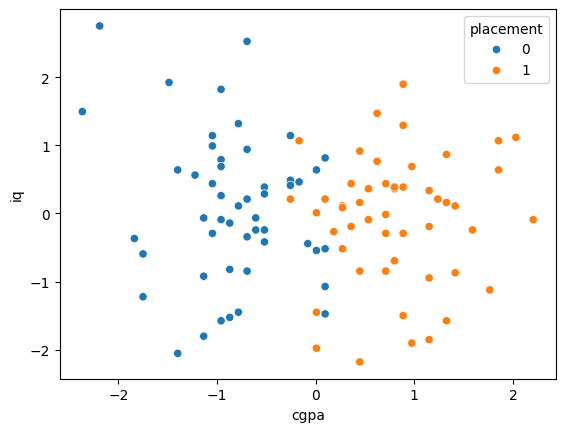

In [7]:
sns.scatterplot(x = 'cgpa', y = 'iq', hue = 'placement', data = df)

In [8]:
def step(z):
    return 1 if z > 0 else 0

In [10]:
def perceptron(X, y):
    #* Setting the bias for all Xi
    X = np.insert(X.values, 0, 1, axis = 1)
    #* Assigning some arbitrary weights
    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    epoch = 1000
    for _ in range(epoch):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + learning_rate * (y[j] - y_hat) * X[j]
    
    return weights[0], weights[1 : ]

In [11]:
# Training the perceptron
intercept_, coef_ = perceptron(X, y)

In [12]:
print ("Intercept: ", intercept_)
print ("Coefficients: ", coef_)

Intercept:  1.3877787807814457e-16
Coefficients:  [ 0.91299771 -0.23087837]


In [13]:
# Calculating slope (m) and intercept (b) of the decision boundary
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [14]:
x_input = df[['cgpa', 'iq']]
y_input = m*x_input + b

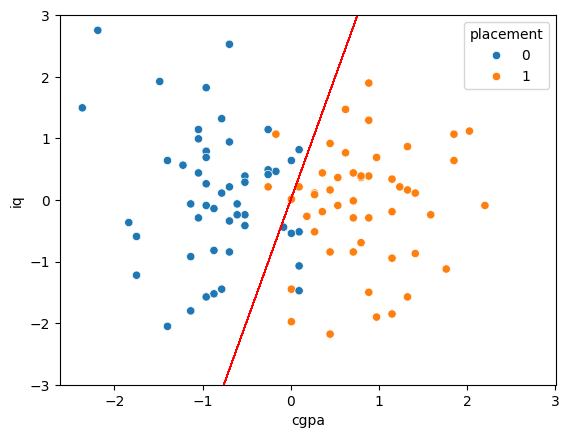

In [15]:
plt.plot(x_input, y_input, color="red", linewidth = 0.8)
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
sns.scatterplot(x = 'cgpa', y = 'iq', hue = 'placement', data = df)
plt.ylim(-3,3)
plt.show()